<div style="display: flex; background-color: RGB(190,22,220);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES</h1>
</div>


# OBJECTIF DE CE NOTEBOOK

When a bill arrives, a machine records all its geometric characteristics. Over the years of our efforts, we have observed dimensional differences between real and counterfeit bills. These differences are difficult to discern with the naked eye, but a machine should be able to differentiate them without any issue.
Therefore, an algorithm needs to be built that, based on the geometric characteristics of a bill, can determine whether it is genuine or counterfeit.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">steps 1 -Importing Libraries and Loading Files</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importing Libraries</h3>
</div>

In [519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

import seaborn as sns


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 -  Loading Files</h3>
</div>

In [521]:
pd_data = pd.read_csv('billets.csv' ,delimiter=';')  

# Check the first few rows
pd

<module 'pandas' from 'C:\\anaconda\\Lib\\site-packages\\pandas\\__init__.py'>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 2 - Exploratory analysis of files</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Exploratory analysis</h3>
</div>

In [524]:
print("Dataset Info:")
print("-" * 40)
print(pd_data.info())

print("\nSummary Statistics:")
print("-" * 40)
print(pd_data.describe())

Dataset Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB
None

Summary Statistics:
----------------------------------------
          diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    

In [525]:
print(pd_data.isnull().sum())

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


In [526]:
pd_data['is_genuine'] = pd_data['is_genuine'].astype(int)
pd_data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [527]:
print(pd_data.info())
print(pd_data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int32  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 76.3 KB
None
        is_genuine     diagonal  height_left  height_right   margin_low  \
count  1500.000000  1500.000000  1500.000000   1500.000000  1463.000000   
mean      0.666667   171.958440   104.029533    103.920307     4.485967   
std       0.471562     0.305195     0.299462      0.325627     0.663813   
min       0.000000   171.040000   103.140000    102.820000     2.980000   
25%       0.000000   171.750000   103.820000    103.710000     4.015000   
5

<div style="border: 1px solid RGB(51,165,182);" >
 <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 2.1  - Predict Missing margin_low Values </h3>
</div >



In [529]:
# Create a copy of the original data
data_original = pd_data.copy()

In [530]:
#  Prepare features for prediction
# Separate data into sets with and without missing values
data_missing = pd_data[pd_data['margin_low'].isna()]
data_complete = pd_data[~pd_data['margin_low'].isna()]

In [531]:

# Define features for prediction (excluding margin_low)
features = ['length', 'height_left', 'height_right', 'margin_up', 'diagonal', 'is_genuine']
target = 'margin_low'


In [532]:

# Prepare training data
X = data_complete[features]
y = data_complete[target]

In [533]:
# Split into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1170, 6)
Testing set shape: (293, 6)


In [534]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.4f}")


Model Performance:
Mean Squared Error: 0.1492
R² Score: 0.6460
Root Mean Squared Error: 0.3863


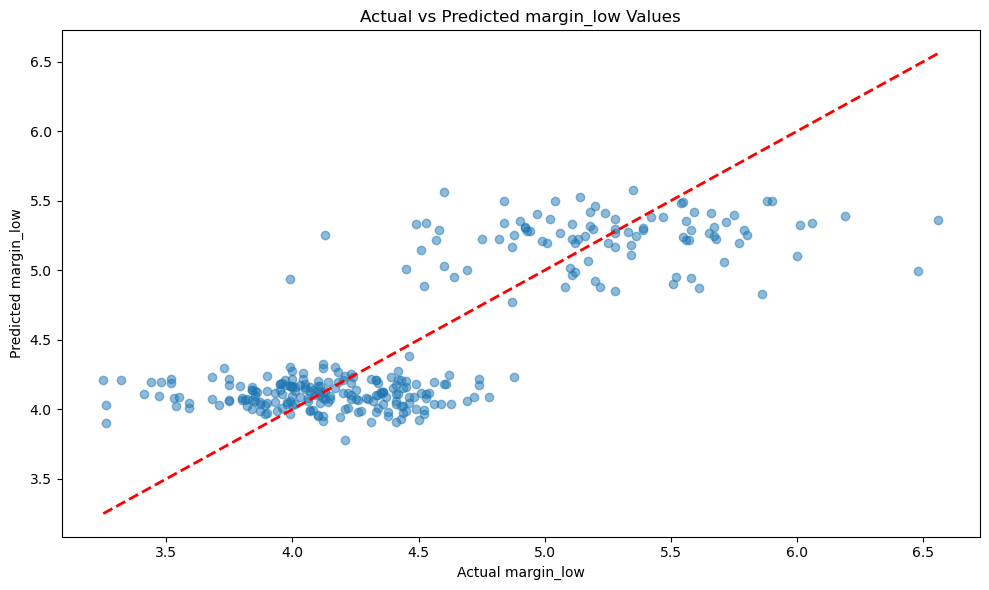

In [535]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual margin_low')
plt.ylabel('Predicted margin_low')
plt.title('Actual vs Predicted margin_low Values')
plt.tight_layout()
plt.show()

In [536]:
# Predict missing values
X_missing = data_missing[features]
predicted_values = rf_model.predict(X_missing)

In [537]:
# Create final dataset with filled values
data_filled = pd_data.copy()
data_filled.loc[data_filled['margin_low'].isna(), 'margin_low'] = predicted_values


Statistical Summary:

Original margin_low:
count    1463.000000
mean        4.485967
std         0.663813
min         2.980000
25%         4.015000
50%         4.310000
75%         4.870000
max         6.900000
Name: margin_low, dtype: float64

Predicted margin_low (for missing values):
count    37.000000
mean      4.382543
std       0.488855
min       3.910300
25%       4.090300
50%       4.162600
75%       4.283200
max       5.438000
dtype: float64


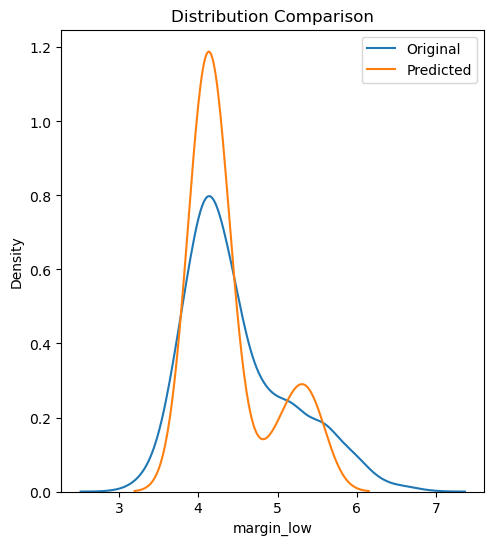

In [538]:
# Compare distributions of original, missing, and predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=data_original['margin_low'], label='Original')
sns.kdeplot(data=predicted_values, label='Predicted')
plt.title('Distribution Comparison')
plt.legend()


# Cell 8: Statistical Summary
print("\nStatistical Summary:")
print("\nOriginal margin_low:")
print(data_original['margin_low'].describe())
print("\nPredicted margin_low (for missing values):")
print(pd.Series(predicted_values).describe())

In [539]:
print(data_filled.isnull().sum())

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
 <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 2.3  -  the distribution of different features in the dataset </h3>
</div >



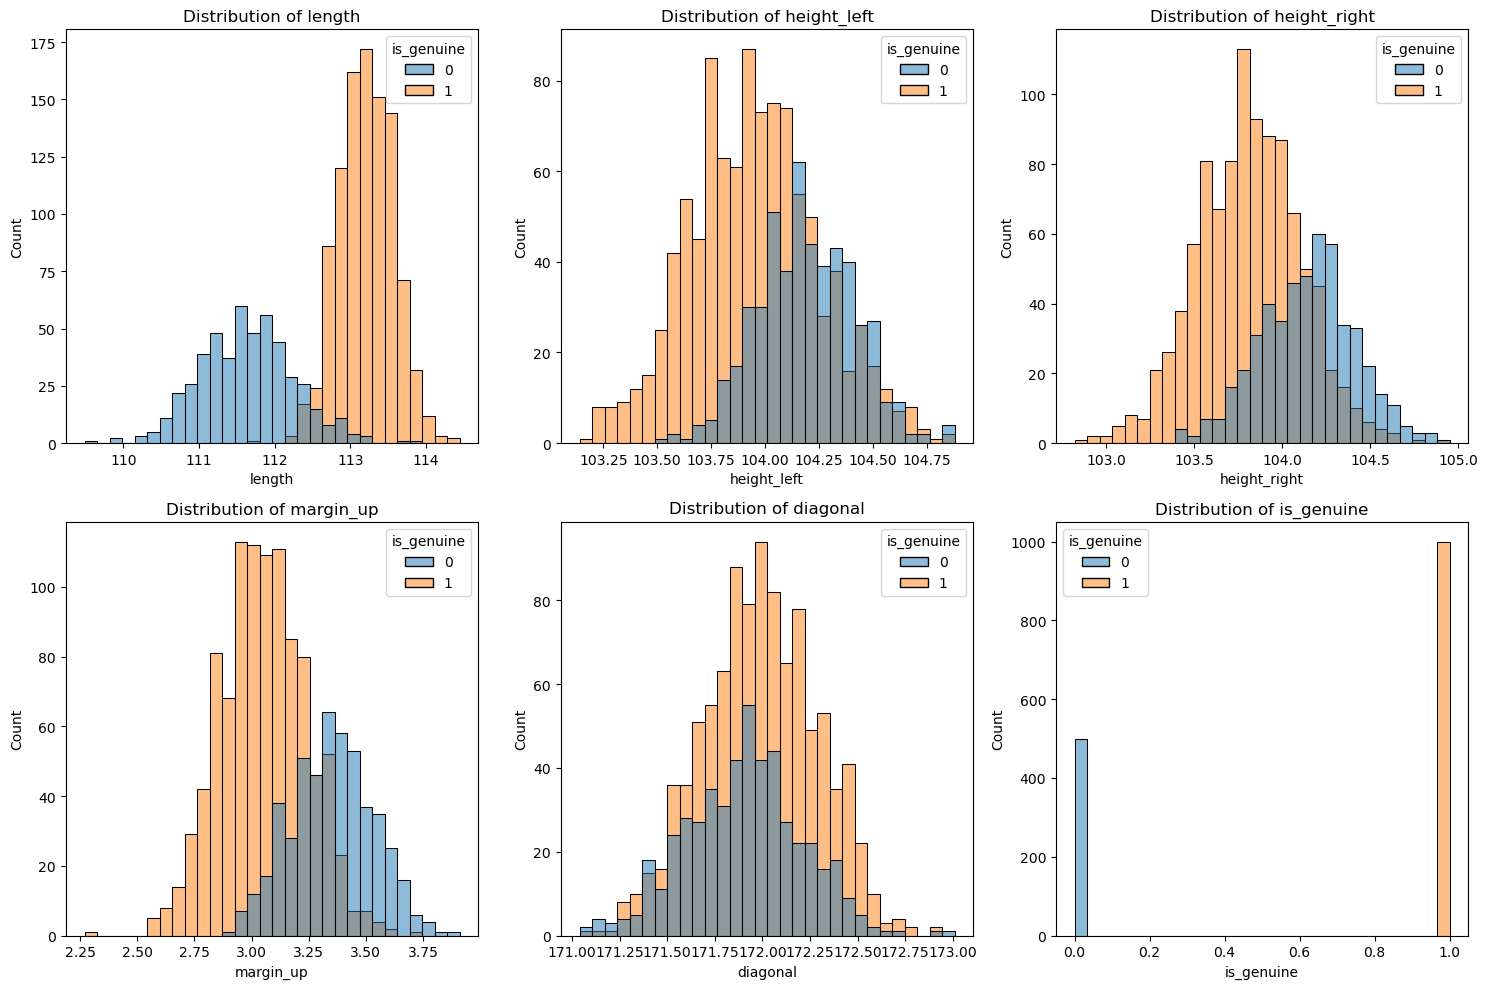

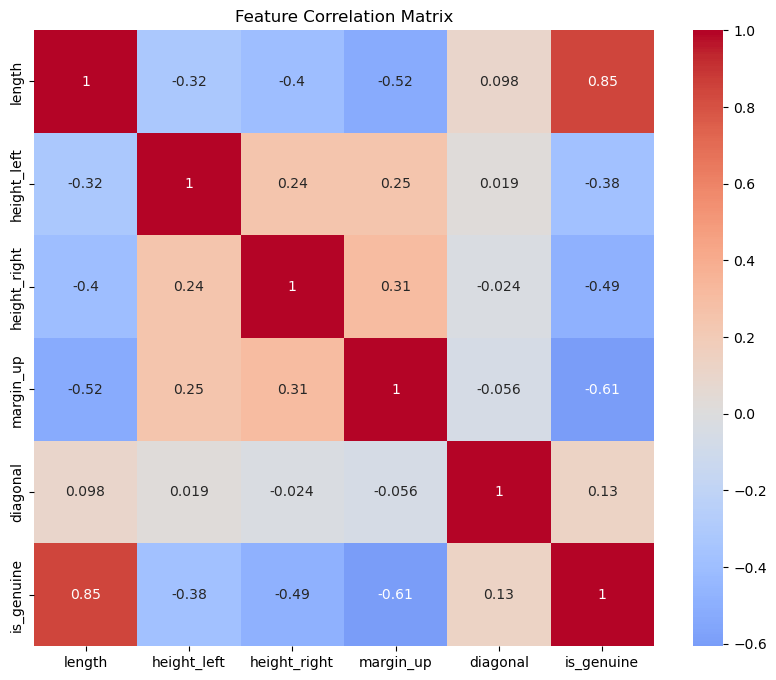

In [541]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data_filled, x=feature, hue='is_genuine', bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Cell 4: Correlation Analysis
# Create correlation matrix
correlation_matrix = data_filled[features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 3 - Model Training </h2>
</div>

In [543]:
data_filled_new = data_filled
# Prepare features and target
X = data_filled_new.drop(columns=['is_genuine'])  
y = data_filled_new['is_genuine'] 
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale the training data

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
# Split the data
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(X_test)




<div style="border: 1px solid RGB(51,165,182);" >
 <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.1  -  Logistic Regression </h3>
</div >



In [545]:


# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000 ,random_state=0)
log_reg.fit(x_train, y_train)

# Make predictions
log_reg_pred = log_reg.predict(X_test)

# Save the model
joblib.dump(log_reg, 'log_reg.pkl')


# Evaluate
print("Logistic Regression Results:")
print("-" * 40)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, log_reg_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, log_reg_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, log_reg_pred)
print(f"\nAccuracy Score: {accuracy:.2f}")


Logistic Regression Results:
----------------------------------------

Confusion Matrix:
[[107   3]
 [  0 190]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Accuracy Score: 0.99


<div style="border: 1px solid RGB(51,165,182);" >
 <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.2   K-means </h3>
</div >



In [547]:
# Train K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)

# Save the model
joblib.dump(kmeans, 'kmeans.pkl')
# Make predictions
kmeans_pred = kmeans.predict(X_test_scaled)
# Align labels (0,1 might be flipped)
if sum(kmeans.labels_ == y_train) < sum(kmeans.labels_ != y_train):
    kmeans_pred = 1 - kmeans_pred

print("K-means Results:")
print("-" * 40)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, kmeans_pred))
print("\nClassification Report:")
print(classification_report(y_test, kmeans_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, kmeans_pred)
print(f"\nAccuracy Score: {accuracy:.2f}")


K-means Results:
----------------------------------------

Confusion Matrix:
[[109   1]
 [  2 188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Accuracy Score: 0.99


<div style="border: 1px solid RGB(51,165,182);" >
 <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.3   KNN </h3>
</div >

In [549]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


# Save the model
#joblib.dump(knn, 'knn.pkl')


# Make predictions
knn_pred = knn.predict(X_test_scaled)

print("KNN Results:")
print("-" * 40)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, knn_pred))
print("\nClassification Report:")
print(classification_report(y_test, knn_pred))
# Accuracy Score
accuracy = accuracy_score(y_test, knn_pred)
print(f"\nAccuracy Score: {accuracy:.2f}")

KNN Results:
----------------------------------------

Confusion Matrix:
[[105   5]
 [  0 190]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       110
           1       0.97      1.00      0.99       190

    accuracy                           0.98       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300


Accuracy Score: 0.98


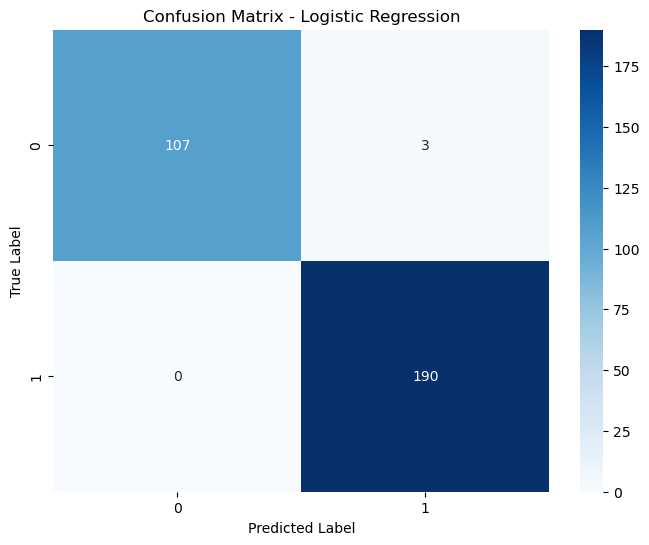

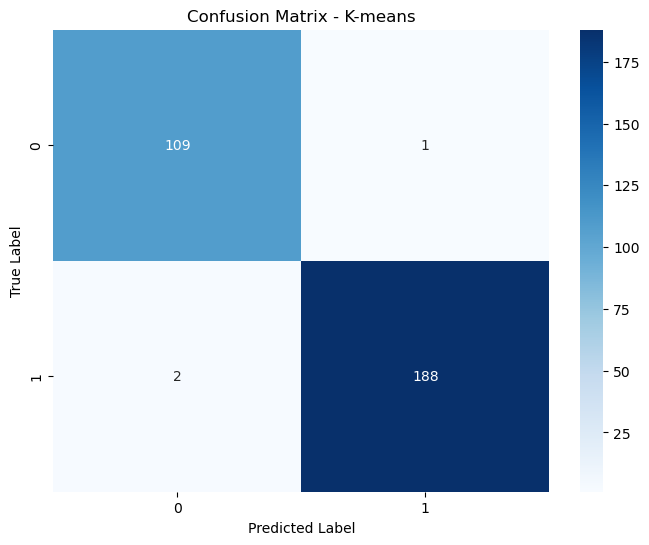

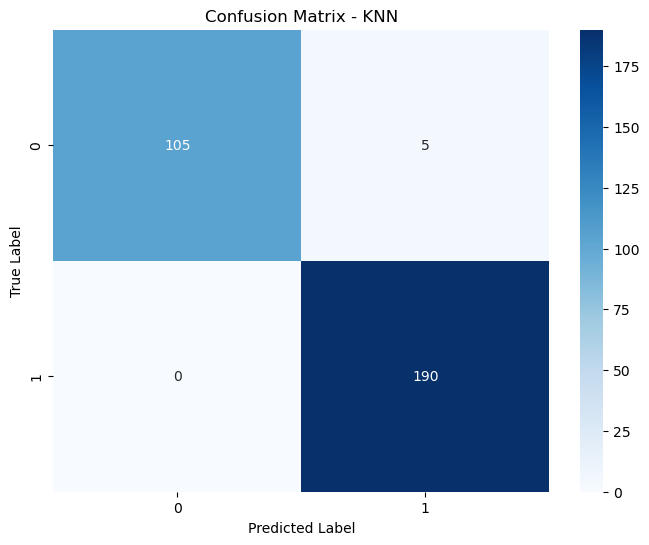

In [550]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(y_test, log_reg_pred, 'Confusion Matrix - Logistic Regression')
plot_confusion_matrix(y_test, kmeans_pred, 'Confusion Matrix - K-means')
plot_confusion_matrix(y_test, knn_pred, 'Confusion Matrix - KNN')


<div style="border: 1px solid RGB(51,165,182);" >
 <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.4  -  Train Logistic Regression</h3>
</div >


In [552]:
joblib.dump(log_reg, 'log_reg.joblib')
print("Model saved successfully as 'log_reg.joblib'.")

# Load the logistic regression model
LR_model = joblib.load('log_reg.joblib')

# Make predictions on the test data
y_predict = LR_model.predict(X_test)


# Calculate the accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy of the Logistic Regression model: {accuracy * 100:.2f}%")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_predict))

Model saved successfully as 'log_reg.joblib'.
Accuracy of the Logistic Regression model: 99.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [553]:
X_test["is_genuine_test"] = y_test
X_test["is_genuine_pred"] =y_predict 

# Calculate mismatches and their indices
mismatches = X_test[X_test["is_genuine_test"] != X_test["is_genuine_pred"]]

# Count the mismatched rows
mismatch_count = len(mismatches)

# Display results
print(f"Total number of rows: {len(data_filled_new)}")
print(f"Number of mismatched rows: {mismatch_count}")
if mismatch_count > 0:
    print(f"\nMismatched rows {mismatch_count}:")
    print(mismatches.head(10))
else:
    print("No mismatches found!")


Total number of rows: 1500
Number of mismatched rows: 3

Mismatched rows 3:
      diagonal  height_left  height_right  margin_low  margin_up  length  \
1190    171.45       104.21        104.18        4.55       3.52  113.21   
1073    172.13       103.67        103.82        4.27       3.22  112.15   
1325    171.83       104.39        104.17        5.51       3.33  113.64   

      is_genuine_test  is_genuine_pred  
1190                0                1  
1073                0                1  
1325                0                1  
